# Support Vector Machines Assignment
## Forest fires data
classify the Size_Categorie using SVM

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [78]:
data = pd.read_csv('forestfires.csv')

### Data Description
- month:	month of the year: 'jan' to 'dec'
- day:	day of the week: 'mon' to 'sun'
- FFMC:	FFMC index from the FWI system: 18.7 to 96.20
- DMC:	DMC index from the FWI system: 1.1 to 291.3
- DC:	DC index from the FWI system: 7.9 to 860.6
- ISI:	ISI index from the FWI system: 0.0 to 56.10
- temp:	temperature in Celsius degrees: 2.2 to 33.30
- RH:	relative humidity in %: 15.0 to 100
- wind:	wind speed in km/h: 0.40 to 9.40
- rain:	outside rain in mm/m2 : 0.0 to 6.4
- area: Area of forest burnt

In [57]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


Checking null values in data

In [79]:
data.isna().sum().any()

False

Checking duplicated records in data

In [80]:
data.duplicated().sum()

8

8 duplicate records found !. Removing all duplicated records.

In [81]:
data.drop_duplicates(inplace=True)

### Data Visualization
Categorical variables

<AxesSubplot:xlabel='day', ylabel='count'>

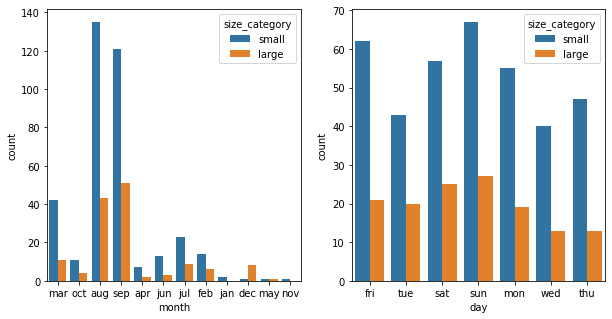

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=data,x='month',hue='size_category')
plt.subplot(1,2,2)
sns.countplot(data=data,x='day',hue='size_category')

Numerical variables

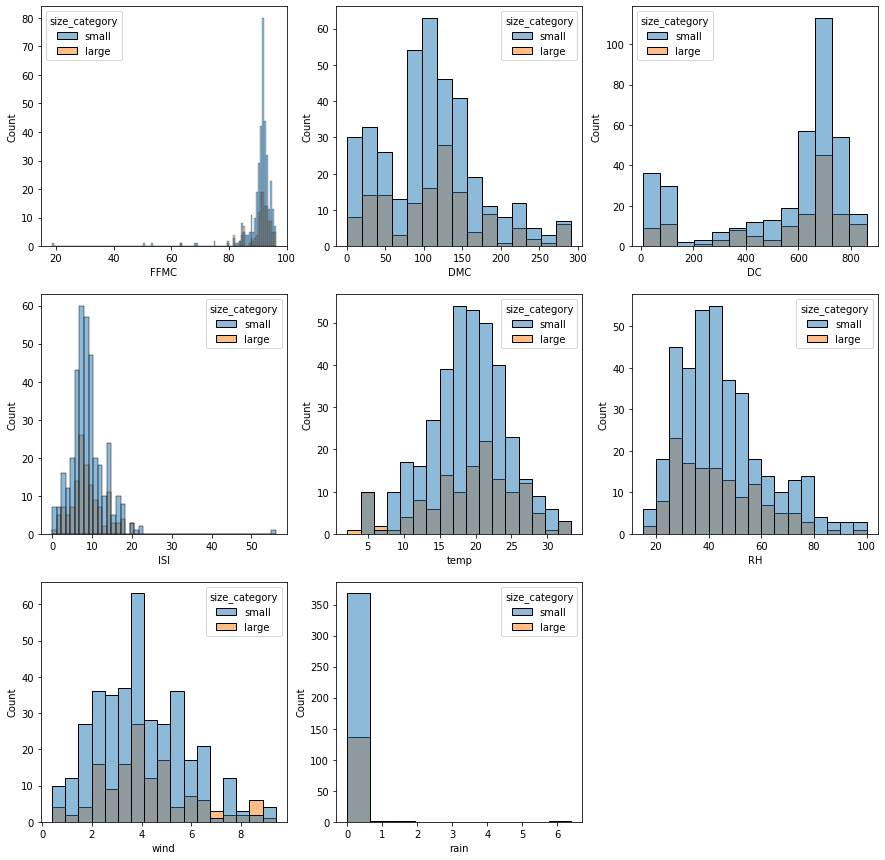

In [62]:
num_columns = ['FFMC','DMC','DC','ISI','temp','RH','wind','rain']

plt.figure(figsize=(15,15))
for i in range(len(num_columns)):
    plt.subplot(3,3,i+1)
    sns.histplot(data=data,x=num_columns[i],hue='size_category')

### Preparing data for model building

Dropping unncessary columns

In [82]:
data.drop(['month','day','area'], axis=1, inplace=True)

In [83]:
x = data.drop('size_category', axis=1)
y = data['size_category']

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

### Parameter Tuning

**C**
- default value is 1.0
- Regularization parameter. The strength of the regularization is inversely proportional to C.
- Must be strictly positive.
- We will be considering [10,1,0.1]

**kernel**
- defualt values is 'rbf'
- Specifies the kernel type to be used in the algorithm.
- Possible values:
    - 'linear'
    - 'poly'
    - 'rbf'
    - 'sigmoid'
    - 'precomputed'
    - [callable]
- We will be considering ['linear', 'rbf', 'sigmoid']

**gamma**
- default value is 'scale'
- Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
- Possible values:
    - 'scale', gamma = 1 / (n_features * X.var())
    - ‘auto’, gamma = 1 / n_features
    - float, must be non-negative.
- We will be considering ['scale','auto']

In [70]:
param_grid = {'C':[10,1,0.1],
              'gamma': ['scale','auto'],
              'kernel':['linear','rbf','sigmoid']}

In [71]:
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 1, 0.1], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [72]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best score:  0.7380076445293836


### Using best parameter found to make final model

In [86]:
classifier = SVC(C=10, gamma='scale',kernel='linear')
classifier.fit(x_train,y_train)

SVC(C=10, kernel='linear')

Testing model on test data

In [87]:
y_pred = classifier.predict(x_test)

Confusion matrix

In [88]:
confusion_matrix(y_test,y_pred)

array([[ 1, 11],
       [ 0, 39]])

Accuracy

In [89]:
accuracy_score(y_pred,y_test)*100

78.43137254901961

We created SVM classifier with 78.4% accuracy